## Pima Indians Diabetes Analysis

#####  Perform Exploratory Data Analysis to identify the impact of various attributes on the diabetes rates of the Pima Indians

### Attribute Information:

1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function 
8. Age (years) 
9. Class variable (0 or 1)

##### Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt   
import seaborn as sns

from sklearn import metrics

from sklearn.model_selection import train_test_split

# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [3]:

#Load the file from local directory using pd.read_csv which is a special form of read_table

pima_df = pd.read_csv("pima-indians-diabetes.csv")

In [4]:
pima_df.head(5)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Let us check whether any of the columns has any value other than numeric i.e. data is not corrupted such as a "?" instead of 
# a number.

# we use np.isreal a numpy function which checks each column for each row and returns a bool array, 
# where True if input element is real.
# applymap is pandas dataframe function that applies the np.isreal function elementwise

# Following line selects those rows which have some non-numeric value in any of the columns hence the  ~ symbol

pima_df[~pima_df.applymap(np.isreal).all(1)]

,Preg,Plas,Pres,skin,test,mass,pedi,age,class


In [6]:
#Lets analysze the distribution of the various attributes
pima_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Plas,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
Pres,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
test,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
mass,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [8]:
# Let us look at the target column which is 'class' to understand how the data is distributed amongst the various values
pima_df.groupby(["class"]).count()

# Most are not diabetic. The ratio is almost 1:2 in favor or class 0.  The model's ability to predict class 0 will 
# be better than predicting class 1. 

,Preg,Plas,Pres,skin,test,mass,pedi,age
class,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


#### Skewness of the variables

In [9]:
pima_df.skew()

Preg     0.901674
Plas     0.173754
Pres    -1.843608
skin     0.109372
test     2.272251
mass    -0.428982
pedi     1.919911
age      1.129597
class    0.635017
dtype: float64

#### PairPlot

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


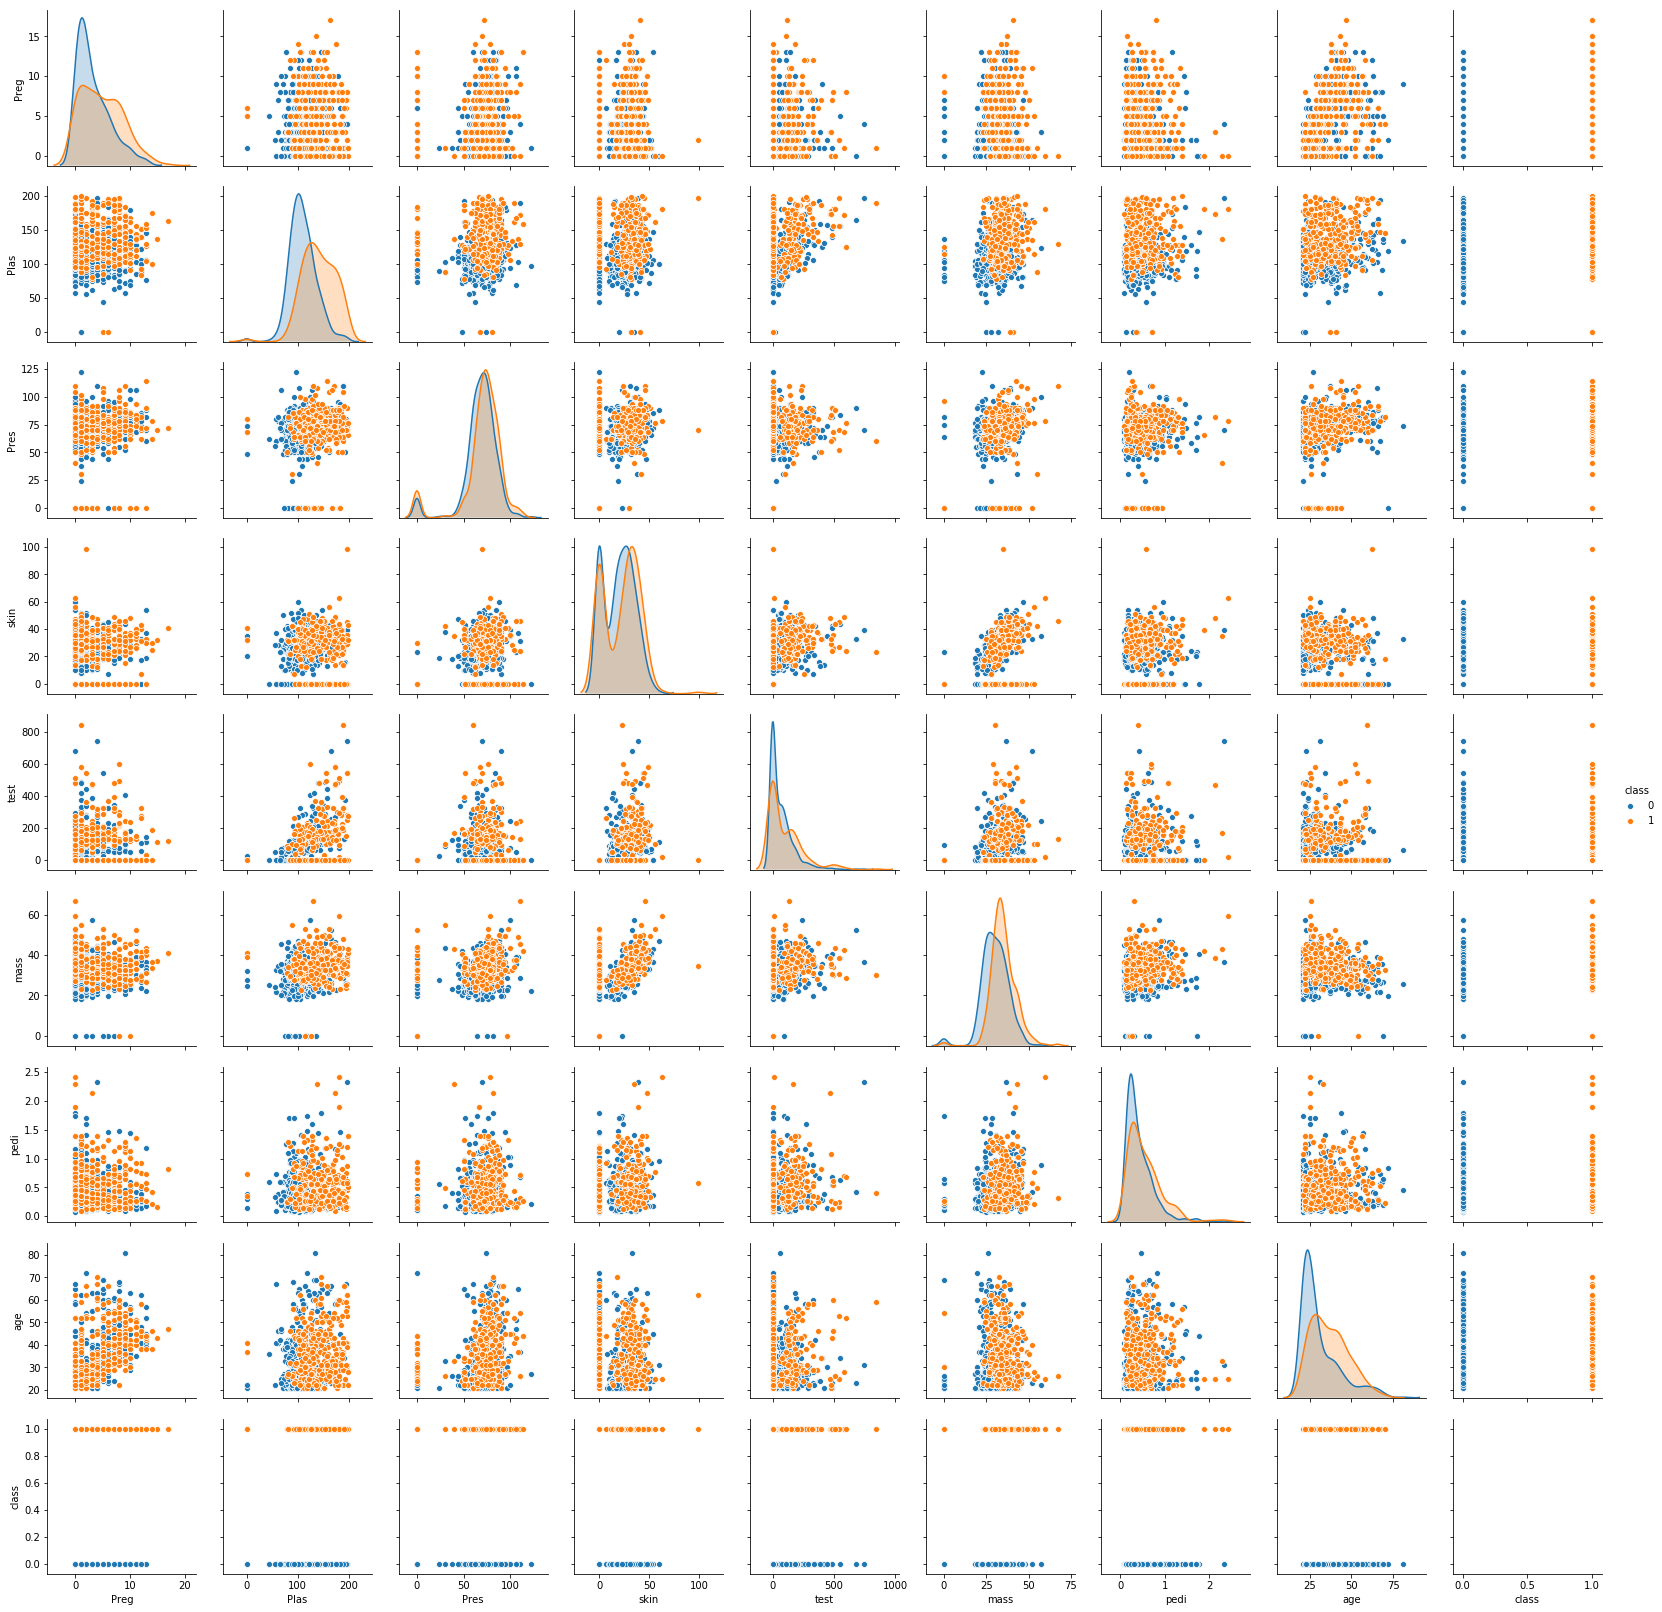

In [10]:
# Pairplot using s
sns.pairplot(pima_df, hue='class')

#### Observations


1. Data for all the attributes are skewed, especially for the variable "test"

2. The mean for test is 80(rounded) while the median is 30.5 which clearly indicates an extreme long tail on the right

3. Attributes which look normally distributed (plas, pres, skin, and mass).
4. Some of the attributes look like they may have an exponential distribution (preg, test, pedi, age).
5. Age should probably have a normal distribution, the constraints on the data collection may have skewed the distribution.
6. There is no obvious relationship between age and onset of diabetes.
7. There is no obvious relationship between pedi function and onset of diabetes.


#### Heat map

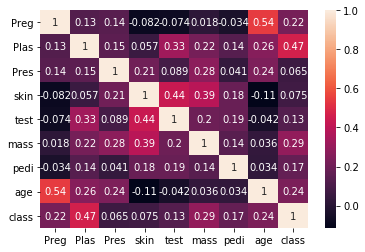

In [11]:
# Pairplot using s
corr = pima_df.corr()
sns.heatmap(corr, annot = True)

#### Observations
1. None of the variables show a high correlation with the outcome class
2. 'Glucose' variable, however, stands out with a corr coefficient of 0.47 

In [13]:
from scipy.stats import zscore

numeric_cols = pima_df.drop('class', axis=1)

# Copy the 'Outcome' column alone into the y dataframe. This is the dependent variable
class_values = pd.DataFrame(pima_df[['class']])

numeric_cols = numeric_cols.apply(zscore)
pima_df_z = numeric_cols.join(class_values)   # Recreating pima_df by combining numerical columns with car names

pima_df_z.head()


,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B881B899E8>,
      dtype=object)

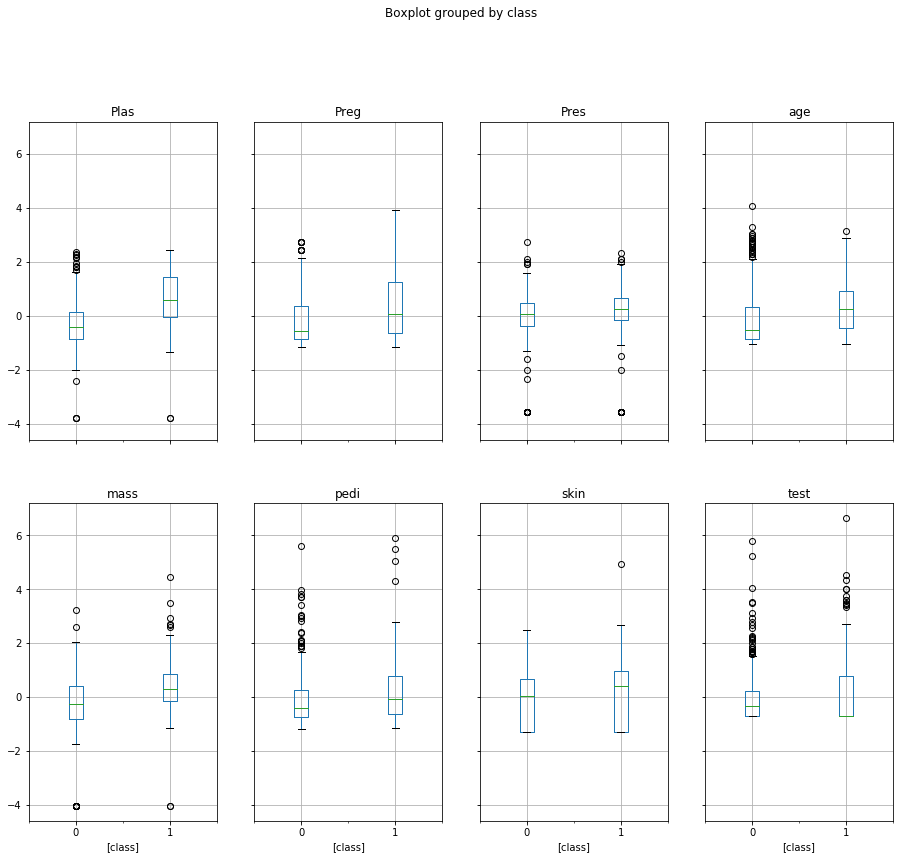

In [14]:
import matplotlib.pylab as plt

pima_df_z.boxplot(by = 'class',  layout=(3,4), figsize=(15, 20))

#print(pima_df.boxplot('preg'))



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B88285BC50>]],
      dtype=object)

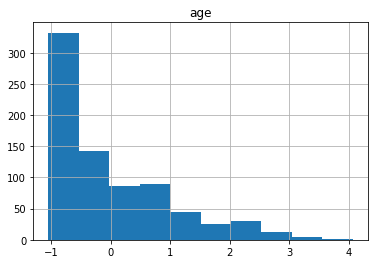

In [16]:
pima_df_z.hist('age')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B88276CB70>]],
      dtype=object)

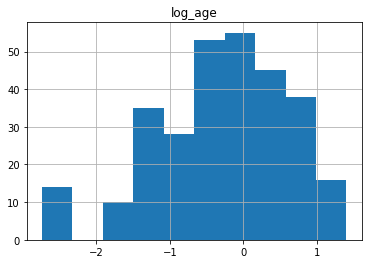

In [18]:
# Log transforming of the columns and checking for normality

pima_df_z["log_age"] = np.log(pima_df_z['age'])
pima_df_z["log_test"] = np.log(pima_df_z["test"])
pima_df_z["log_preg"] = np.log(pima_df_z["Preg"])
pima_df_z.hist('log_age')



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B8821A05C0>]],
      dtype=object)

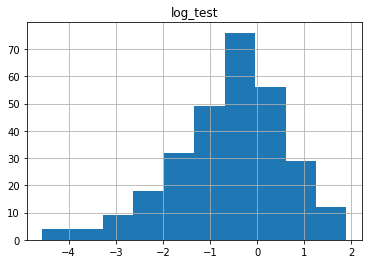

In [19]:
pima_df_z.hist("log_test")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B882269470>]],
      dtype=object)

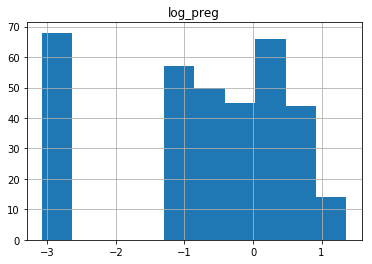

In [20]:
pima_df_z.hist("log_preg")

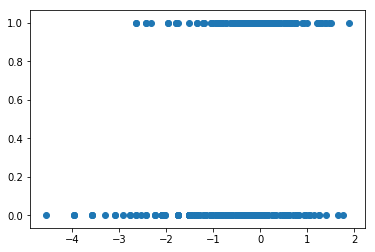

In [21]:
plt.scatter(pima_df_z['log_test'] , pima_df_z["class"])

### Conclusion -

1. Too many outliers on each dimensions indicated by long tails with gaps.
2. Data not normally distributed in the dimensions. 
3. log transformation of exponential distributed data results near normal distribution
4. None of the given attributes are able to distinguish the two classes. The distribution of the two classes eclipse each
   other on all dimensions
5. Expect poor performance


### Pandas Profiling

In [33]:
# let us try pandas-profiling now amd see how does it simplify the process of EDA
#! pip install pandas-profiling

In [22]:
import pandas_profiling
pima_df.profile_report(style={'full_width':True})